<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/110_intro_prob.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(intro_prob_notebook)=
# Introduzione al calcolo delle probabilità

In questa parte della dispensa verrà introdotta la teoria delle probabilità. Prima di entrare nei dettagli, cerchiamo di capire perché la probabilità sia così importante per la ricerca scientifica.

La scienza fa affidamento sull'inferenza induttiva, e la teoria delle probabilità è cruciale in questo processo poiché non possiamo mai essere completamente certi della verità di una proposizione, come ad esempio un'ipotesi o una teoria. Invece, possiamo solo assegnare un grado di certezza probabilistico ad essa. L'approccio bayesiano è una scuola di pensiero che utilizza la probabilità per quantificare il grado di fiducia che possiamo attribuire ad una proposizione. L'inferenza statistica bayesiana, come metodo di inferenza induttiva, si propone di quantificare la fiducia che si ha nell'ipotesi $H$ dopo aver osservato un dato di evidenza $E$. La teoria delle probabilità è fondamentale per la comprensione dell'inferenza statistica bayesiana in quanto viene utilizzata per quantificare tale grado di fiducia. Quindi, per comprendere l'inferenza statistica bayesiana è necessario conoscere, almeno a livello di elementi di base, la teoria delle probabilità.

In [1]:

import pandas as pd
import itertools as it
from matplotlib import pyplot as plt
import seaborn as sns
import random
import math
from numpy import random
import numpy as np
from scipy.stats import bernoulli, binom
from scipy.constants import golden

In [2]:
%matplotlib inline
sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="colorblind",
    rc={'figure.figsize': (5.0, 5.0/golden)},
)
SEED = 123456
rng = np.random.default_rng(SEED)

## Storia della probabilità

L'origine del concetto di probabilità può essere fatta risalire alla corrispondenza tra i matematici francesi Pierre de Fermat e Blaise Pascal, in cui discussero il problema del gioco d'azzardo proposto da Antoine Gombaud, Cavaliere de Méré. Il problema può essere così formulato (si veda la formulazione esatta su [Wikipedia](https://en.wikipedia.org/wiki/Problem_of_points)):

> Immaginiamo due persone che partecipano a un gioco a più round. In ogni round, entrambe le persone hanno la stessa probabilità di vincere. La prima persona che vince sei round consecutivi si aggiudicherà un ricchissimo premio in denaro. Ora, supponiamo che A e B abbiano già disputato sei round, con A che ha vinto cinque volte e B una volta. In quel momento, il gioco è stato interrotto a causa di un temporale. Poiché né A né B hanno raggiunto le sei vittorie, anziché assegnare il premio a uno di loro, hanno deciso di dividerlo. Ma qual è il modo più equo per farlo?

La discussione tra Fermat e Pascal ha portato alla formalizzazione dell'utilizzo della matematica per risolvere questo problema. In sostanza, una soluzione proposta consiste nel considerare le probabilità di vincita di ciascun giocatore. Ad esempio, se A ha una probabilità del 97% di vincere il premio alla fine e B ha una probabilità del 3%, allora sembrerebbe equo assegnare ad A il 97% del premio.


## Che cos'è la probabilità?

Esistono due punti di vista relativi al significato del concetto di probabilità. 

- Secondo una prostettiva che possiamo chiamare "ontologica", la probabilità è considerata come una proprietà intrinseca del mondo, indipendente dalla nostra esperienza. In questa visione, la probabilità è vista come una caratteristica oggettiva del mondo stesso.
- D'altra parte, la prospettiva "epistemica" vede la probabilità come una misura della nostra conoscenza del mondo anziché una proprietà oggettiva. Questa visione soggettiva della probabilità dipende dalla nostra conoscenza e dal nostro punto di vista.

### Interpretazione classica

La prima definizione di probabilità è stata proposta da Pierre-Simon Laplace (1749-1827), che si è avvalso del calcolo combinatorio. Secondo Laplace, la probabilità $P$ di un evento è definita come il rapporto tra il numero di casi in cui l'evento si verifica e il numero totale di casi possibili. In questa definizione, un evento è qualcosa a cui è possibile assegnare un valore di verità, ovvero qualcosa che può essere vero o falso. Ad esempio, la probabilità di ottenere un 3 in un lancio di un singolo dado è 1/6 ≃ 0.17, poiché c'è un solo caso favorevole (il lancio ha prodotto un 3) su sei casi possibili (i numeri da 1 a 6). In modo simile, la probabilità di estrarre un asso da un mazzo di 54 carte (52 figure e 2 jolly) è 4/54 ≃ 0.074, poiché ci sono quattro assi nel mazzo. Tuttavia, questa definizione è insoddisfacente in quanto si basa sull'assunzione che ogni evento sia equiprobabile, il che non è sempre vero. Inoltre, questa definizione è circolare poiché per definire il concetto di probabilità, è necessario prima definire cosa significa che gli eventi siano equiprobabili, e quindi si deve già conoscere il concetto di probabilità.

### Interpretazione frequentista

Un secondo tentativo di definire la probabilità si basa sull'approccio frequentista, che può essere attribuito a molti autori. In questo approccio, la probabilità è definita sulla base delle frequenze osservate dell'occorrenza di un evento. Questo approccio nasce dalla difficoltà di assegnare una probabilità agli eventi assumendo il principio di equiprobabilità, come nel caso dei dadi o delle carte di un mazzo. Sebbene la probabilità di ottenere 3 come risultato del lancio di un dado sia 1/6 se crediamo che il dado sia bilanciato, se così non fosse non potremmo assegnare la stessa probabilità a tutti i risultati possibili. Tuttavia, possiamo stimare le probabilità come la frequenza $f_3$, definita come il rapporto tra il numero di volte in cui un lancio ha prodotto 3 e il numero totale di lanci.

Si osservi che l'osservazione della frequenza $f_3$ è solo un' approssimazione della probabilità, ma l'accuratezza migliora all'aumentare del numero totale di lanci, $N$. In linea di principio, la probabilità di ottenere 3, $P(3)$, è il limite della frequenza $f_3$ quando il numero totale di lanci $N$ tende all'infinito. Tuttavia, questa definizione richiede l'infinita ripetizione di un esperimento, il che può essere impraticabile o impossibile in molti casi. Inoltre, questa definizione assume che gli eventi futuri siano simili agli eventi passati, il che non è sempre garantito.

In entrambi i casi precedenti valgono le seguenti regole: 

- se un evento è impossibile, la sua probabilità è nulla; 
- se un evento è certo, la sua probabilità è 1.

### Interpretazione soggettivista

Una visione più recente è rappresentata dall'approccio della probabilità bayesiana, sviluppato da Thomas Bayes (1701-1761). In questo approccio, la probabilità è considerata una valutazione soggettiva del grado di convinzione che un evento si verifichi. Questa definizione è spesso espressa in termini di scommesse, ma può essere applicata a qualsiasi situazione in cui dobbiamo valutare la probabilità di un evento.

Dal punto di vista epistemico, la probabilità fornisce una misura della nostra incertezza sul verificarsi di un evento, alla luce delle informazioni disponibili. Si potrebbe immaginare una "scala" naturale che va dall'evento impossibile (0) all'evento certo (1). La probabilità rappresenta la posizione di questo evento su tale scala e quantifica lo stato della nostra incertezza rispetto alla veridicità di una proposizione. In altre parole, la probabilità è una misura del grado di fiducia che abbiamo nell'occorrenza di un evento, basata sulle nostre conoscenze e sulla nostra esperienza.

L'incertezza che sperimentiamo quando facciamo previsioni può avere due origini diverse. 

- La prima è dovuta alla nostra ignoranza riguardo alle cause sottostanti o ai meccanismi che generano i dati. Questa forma di incertezza è chiamata incertezza epistemica. 
- La seconda forma di incertezza, chiamata invece incertezza aleatoria, deriva dalla variabilità intrinseca dei fenomeni, che non può essere ridotta neanche raccogliendo più dati. Ad esempio, consideriamo il lancio di una moneta equilibrata. Sappiamo con certezza che la probabilità di ottenere testa è $P=0.5$, quindi non c'è incertezza epistemica, tuttavia, ciò non è sufficiente per prevedere con certezza il risultato, poiché l'incertezza aleatoria persiste anche in assenza di incertezza epistemica.

```{admonition} Nota
La nozione di probabilità come 'epistemica' può essere meglio compresa attraverso l'esempio classico della sequenza di lanci di una moneta, spesso utilizzato per descrivere un evento "aleatorio". Tuttavia, McElreath ci invita a riflettere più attentamente su questo fenomeno. Potremmo pensare che la casualità della sequenza di lanci sia dovuta al fatto che non vi è alcuna informazione nei lanci passati che possa aiutare a prevedere i lanci futuri. Tuttavia, questo non è del tutto corretto. Il lancio di una moneta è infatti un fenomeno deterministico, regolato dalle leggi fisiche. In realtà, esistono macchine che, applicando la stessa forza ogni volta, possono ripetere lo stesso esito (testa o croce) ad ogni prova. Pertanto, la casualità della sequenza di lanci non è una proprietà intrinseca del fenomeno fisico che si vuole descrivere (poiché i fenomeni fisici sono sempre deterministici, poiché sono regolati dalle leggi della fisica), ma è piuttosto epistemica, ovvero dipende dallo stato dell'informazione disponibile all'osservatore.
```

L'interpretazione frequentista della probabilità definisce la probabilità come la frequenza relativa a lungo termine di un grande numero di ripetizioni di un esperimento casuale sotto le stesse condizioni. Secondo l'approccio bayesiano, invece, la probabilità è considerata come una valutazione soggettiva del grado di convinzione che qualcosa accadrà.

Nell'interpretazione bayesiana, la probabilità descrive lo stato della nostra incertezza rispetto al contenuto di verità di una proposizione. Non richiede la ripetizione infinita di un esperimento casuale sotto le stesse condizioni. Si concentra invece sulla valutazione soggettiva del grado di convinzione di un individuo. Questa concezione bayesiana della probabilità va oltre l'evento stesso e considera anche il soggetto che assegna la probabilità. La probabilità è assegnata dal decisore sulla base delle sue conoscenze a priori, integrate con il suo background culturale e personale. Di conseguenza, la probabilità può variare da soggetto a soggetto, poiché dipende dalle informazioni disponibili, dall'esperienza personale e dal punto di vista di ogni decisore. In pratica, la probabilità bayesiana rappresenta il "grado di fiducia" o *degree of belief* di un individuo rispetto all'occorrenza di un evento E in un dato istante e con un dato insieme di informazioni.


### Formalizzazione dell'incertezza

La probabilità come rappresentazione dell'incertezza epistemica è stata formalizzata in ambito bayesiano da Ramsey e de Finetti. Secondo de Finetti, l'assegnazione di probabilità corrisponde alla quota $p(E)$ che un individuo è disposto a scommettere sul verificarsi o meno dell'evento $E$. Questo approccio si basa sui principi di equità e coerenza delle scommesse. In particolare, una scommessa è equa se il ruolo di banco e di giocatore possono essere scambiati in qualsiasi momento del gioco e in qualsiasi condizione, mentre una scommessa è coerente se non esistono combinazioni di scommesse che permettano di ottenere guadagni o perdite certi.

Il metodo della scommessa fornisce un'operativa per l'assegnazione della probabilità, che si basa sull'assunzione di razionalità e coerenza del decisore. Inoltre, tale definizione operativa permette di dimostrare le proprietà classiche della probabilità, come l'impossibilità di assumere valori negativi e l'essere compresa tra 0 e 1. Inoltre, se un evento è certo, la sua probabilità è 1, mentre se è impossibile, la sua probabilità è 0.

L'approccio definettiano alla probabilità, basato sull'assegnazione soggettiva di probabilità, è stato oggetto di critiche riguardo all'arbitrarietà dell'assegnazione stessa, che sembra negare la validità della teoria. In risposta a tali critiche, i bayesiani sostengono che gli approcci oggettivisti alla probabilità nascondono scelte arbitrarie preliminari e sono basati su assunzioni implausibili. Secondo i bayesiani, è più onesto esplicitare tutte le scelte arbitrarie effettuate nel corso dell'analisi, in modo da controllarne la coerenza e la razionalità. In altre parole, gli approcci bayesiani sostengono che l'assegnazione soggettiva di probabilità sia preferibile rispetto ad approcci oggettivisti perché permette di essere più trasparenti riguardo alle scelte arbitrarie fatte nel processo decisionale.

```{admonition} Nota
Per chi desidera approfondire, un'introduzione molto leggibile alle tematiche della definizione della probabilità nella storia della scienza è fornita nel primo capitolo del testo *Bernoulli's fallacy* {cite:p}`clayton2021bernoulli`.
```

## Variabili casuali e probabilità di un evento

Esaminiamo qui di seguito alcuni concetti di base della teoria delle probabilità.

### Eventi e probabilità

Nella teoria delle probabilità il risultato "testa" nel lancio di una moneta è chiamato *evento*. Un evento, denotato da una variabile binaria, corrisponde ad uno stato del mondo che si verifica oppure no. Ad esempio, $Y$ = 1 può denotare l'evento per cui il lancio di una moneta produce il risultato testa. Il funzionale $P(Y)$ denota la probabilità con cui si ritiene che l'evento $Y$ sia vero (o la proporzione di volte che si verifica tale evento osservando a lungo termine delle ripetizioni indipendenti di un esperimento casuale). Ad esempio, per il lancio di una moneta equilibrata, la probabilità dell'evento "il risultato del lancio della moneta è testa" è scritta come $P(Y = 1) = 0.5.$

Se la moneta è equilibrata dobbiamo anche avere $P(Y = 0) = 0.5$. I due eventi $Y$ = 1 e $Y$ = 0 sono *mutuamente esclusivi* nel senso che non possono entrambi verificarsi contemporaneamente: $P(Y = 1\; \land \; Y = 0) = 0.$ Gli eventi $Y$ = 1 e $Y$ = 0 di dicono *esaustivi*, nel senso che almeno uno di essi deve verificarsi e nessun altro tipo di evento è possibile. Nella notazione probabilistica, $P(Y = 1\; \lor \; Y = 0) = 1.$ Il connettivo logico "o" ($\lor$) specifica eventi *disgiunti*, ovvero eventi che non possono verificarsi contemporaneamente (eventi *incompatibili*) e per i quali, perciò, la probabilità della loro congiunzione è $P(A \; \land \; B) = 0$. Il connettivo logico "e" ($\land$), invece, specifica eventi *congiunti*, ovvero eventi che possono verificarsi contemporaneamente (eventi *compatibili*) e per i quali, perciò, la probabilità della loro congiunzione è $P(A \; \land \; B) > 0$. La probabilità del verificarsi di due eventi congiunti $A$ e $B$ si può denotare, in maniera equivalente, con la notazione precedente, oppure con $P(A \cap B)$, oppure con $P(A, B)$.

Si richiede che $0 \leq P(A) \leq 1$, dove $P(A) = 0$ denota l'evento impossibile e $P(A) = 1$ denota l'evento certo. Scriviamo $P(\lnot A)$ o $P(\bar{A})$ per denotare la probabilità che l'evento $A$ non avvenga; questa probabilità è definita come $P(\bar{A}) = 1 − P(A)$.

### Spazio campione e risultati possibili

Anche se ogni lancio di una moneta produce un risultato specifico nel mondo reale, possiamo immaginare anche i possibili risultati alternativi che si sarebbero potuti ottenere. Questo significa che anche se in uno specifico lancio la moneta dà testa ($Y$ = 1), possiamo pensare alla possibilità che il lancio potesse invece produrre croce ($Y$ = 0). Questo tipo di ragionamento, chiamato controfattuale, è fondamentale per comprendere la teoria delle probabilità e l'inferenza statistica.

Assumiamo che $Y$ rappresenti il risultato del lancio di una moneta equilibrata, ovvero non di un lancio generico di una moneta, ma di uno specifico lancio di una specifica moneta in un dato momento. Definendo $Y$ in questo modo, la consideriamo una *variabile casuale*, ovvero una variabile i cui valori non possono essere previsti con esattezza. Se la moneta è equilibrata, c'è una probabilità del 50% che il lancio dia come risultato "testa" e una probabilità del 50% che dia come risultato "croce". Per semplificare il calcolo, le variabili casuali assumono solo valori numerici. Ad esempio, per il lancio specifico della moneta in questione, diciamo che la variabile casuale $Y$ assume il valore 1 se esce testa e il valore 0 se esce croce.

I risultati possibili che si possono osservare come conseguenza del lancio di una moneta determinano i valori possibili che la variabile casuale può assumere. Una variabile casuale può essere *discreta* o *continua*. Una variabile casuale discreta può assumere un numero finito di valori $x_1, \dots ,x_n$, in corrispondenza degli eventi $E_i, \dots, E_n$ che si verificano con le rispettive probabilità $p_1, \dots, p_n$. Un esempio è il punteggio totale di un test psicometrico costituito da item su scala Likert. Invece un esempio di una variabile casuale continua è la distanza tra due punti, che può assumere infiniti valori all'interno di un certo intervallo. 

L'insieme $\Omega$ di tutti i risultati possibili, ovvero l'insieme dei valori che la variabile casuale può assumere, è chiamato *spazio campione* (*sample space*). Lo spazio campione può essere concettualizzato come un'urna contenente una pallina per ogni possibile risultato del lancio della moneta. Su ogni pallina è scritto il valore della variabile casuale. Uno specifico lancio di una moneta -- ovvero, l'osservazione di uno specifico valore di una variabile casuale -- è chiamato *esperimento casuale*.

Il lancio di un dado ci fornisce l'esempio di un altro esperimento casuale. Supponiamo di essere interessati all'evento "il lancio del dado produce un numero dispari". Un *evento* seleziona un sottoinsieme dello spazio campione: in questo caso, l'insieme dei risultati $\{1, 3, 5\}$. Se esce 3, per esempio, diciamo che si è verificato l'evento "dispari" (ma l'evento "dispari" si sarebbe anche verificato anche se fosse uscito 1 o 5).

### Variabili casuali multiple

Le variabili casuali non esistono da sole. Partiamo da una singola variabile casuale $Y$, che rappresenta il risultato di un lancio di moneta equilibrata. Ma supponiamo di lanciare la moneta tre volte. I risultati di ciascuno dei tre lanci possono essere rappresentati da tre diverse variabili casuali, ad esempio, $Y_1$, $Y_2$ e $Y_3$. Ognuno di questi lanci può essere considerato indipendente, il che significa che non dipende dal risultato degli altri lanci. Per ciascuna di queste variabili $Y_n$, con $n \in 1:3$, abbiamo che $P(Y_n =1)=0.5$ e $P(Y_n =0)=0.5$.

Le variabili casuali possono essere combinate utilizzando le operazioni aritmetiche. Se $Y_1$, $Y_2$ e $Y_3$ sono variabili casuali che rappresentano tre lanci di una moneta equilibrata (o, in modo equivalente, un lancio di tre monete equilibrate), possiamo definire la somma di tali variabili casuali come:

$$
Z = Y_1 + Y_2 + Y_3.
$$

Una variabile casuale le cui modalità possono essere costituite solo da numeri interi è detta *variabile casuale discreta*:

$$
\mathbb{Z} = \dots, -2, -1, 0, 1, 2, \dots
$$

(sec-fun-mass-prob)=
## Funzione di massa di probabilità

La *distribuzione di probabilità* è la caratteristica fondamentale di una variabile casuale e rappresenta l'insieme delle probabilità dei suoi valori. Per fare riferimento alle distribuzioni di probabilità delle variabili casuali discrete useremo la notazione $P(\cdot)$, mentre per fare riferimento alla densità di probabilità delle variabili casuali continue useremo la notazione $p(\cdot)$. Il supporto di una variabile casuale è l'insieme dei valori che essa può assumere ed è un elemento importante della sua distribuzione di probabilità. Tale supporto può essere finito, come nel caso di una variabile casuale uniforme di supporto $[a, b]$, oppure infinito, come nel caso di una variabile casuale gaussiana il cui supporto coincide con la retta reale.

È utile avere una funzione che associa una probabilità a ciascun possibile valore di una variabile casuale. In generale, questo è possibile solo se la variabile casuale è discreta, come definito nel paragrafo precedente.

Consideriamo ora, quale esempio, l'esperiemento casuale del lancio di due dadi equilibrati a 6 facce. Definiamo la variabile casuale $Z = D_1 + D_2$ come la somma dei punti ottenuti dai due lanci. Esaminiamo lo spazio campione:

In [477]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]
sample

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

In corrispondenza del primo punto dello spazio campione elencato sopra, $Z$ assume valore 2; corrispondenza del secondo punto assume valore 3, ecc. 

Le sequenze come (1, 1), (1, 2), ecc. sono chiamate "eventi elementari" (ovvero, corrispondono ad un possibile esito dell'esperimento casuale). Lo spazio campione di questo esperimento casuale è costituito da 36 eventi elementari:

In [9]:
len(sample)

36

L'evento $Z = u$, con $u \in 2 \dots, 12$ è un "evento composto", il quale può essere costituito da più eventi elementari. Per esempio, l'evento $Z$ = 2 è composto da un unico evento elementare: (1, 1); l'evento $Z$ = 3 è composto da due eventi elementari: (1, 1) e (1, 2); e così via.

Nel nostro esempio costruito usando Python, ogni elemento della lista `sample` è una lista di due elementi. Per trovare il valore della variabile casuale $Z$, dunque, dobbiamo sommare. In corrispondenza del primo punto campione (1, 1) il valore di $Z$ è 2:

In [20]:
sum(sample[0])

2

In corrispondenza dell'ultimo punto dello spazio campione (6, 6), il valore di $Z$ è 12:

In [28]:
sum(sample[35])

12

Creiamo ora la lista `z` che memorizza il valore assunto dalla variabile casuale $Z$ in corrispondenza di ciascun punto dello spazio campione:

In [10]:
z = [sum(point) for point in sample]
z

[2,
 3,
 4,
 5,
 6,
 7,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 10,
 6,
 7,
 8,
 9,
 10,
 11,
 7,
 8,
 9,
 10,
 11,
 12]

Contiamo quante volte si presenta ciascun possibile valore $Z$ nello spazio campione. Per chiarire cosa viene eseguito nella *list comprehension*, stampiamo anche l'oggetto `event` in ciascuna iterazione del ciclo `for`.

In [7]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]

for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    print(event)
    print(f"z = {i} : {len(event)} / {len(sample)}")

[(1, 1)]
z = 2 : 1 / 36
[(1, 2), (2, 1)]
z = 3 : 2 / 36
[(1, 3), (2, 2), (3, 1)]
z = 4 : 3 / 36
[(1, 4), (2, 3), (3, 2), (4, 1)]
z = 5 : 4 / 36
[(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)]
z = 6 : 5 / 36
[(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]
z = 7 : 6 / 36
[(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)]
z = 8 : 5 / 36
[(3, 6), (4, 5), (5, 4), (6, 3)]
z = 9 : 4 / 36
[(4, 6), (5, 5), (6, 4)]
z = 10 : 3 / 36
[(5, 6), (6, 5)]
z = 11 : 2 / 36
[(6, 6)]
z = 12 : 1 / 36


La variabile casuale $Z$ assume valore 2 in un solo punto dello spazio capione: (1, 1); assume valore 3 in corrispondenza di due punti dello spazio campione: (1, 2) e (2, 1); e così via. 

Calcoliamo infine la *proporzione* di volte in cui ciascun valore $Z$ si presenta nello spazio campione: 1/36, 2/36, ecc.: 

In [11]:
px = []

for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    px.append(len(event) / len(sample))

print(np.array(px).round(3))


[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]


È possibile visualizzare il risultato ottenuto mediante una lista.

In [12]:
list(zip(list(range(2, 13)), px))


[(2, 0.027777777777777776),
 (3, 0.05555555555555555),
 (4, 0.08333333333333333),
 (5, 0.1111111111111111),
 (6, 0.1388888888888889),
 (7, 0.16666666666666666),
 (8, 0.1388888888888889),
 (9, 0.1111111111111111),
 (10, 0.08333333333333333),
 (11, 0.05555555555555555),
 (12, 0.027777777777777776)]

Oppure, in alternativa, possiamo generare un DataFrame.

In [12]:
df = pd.DataFrame()
df["Z"] = np.array(range(2, 13))
df["pz"] = px

df.round(3)

,Z,pz
0,2,0.028
1,3,0.056
2,4,0.083
3,5,0.111
4,6,0.139
5,7,0.167
6,8,0.139
7,9,0.111
8,10,0.083
9,11,0.056


La funzione $p_Z$ così ottenuta associa a ciascun valore $u$ della variabile casuale $Z$ la probabilità dell'evento $Z = u$.

$$
\begin{array}{rclll}
p_Z(2) & =&  1/36 \\
p_Z(3) & = & 2/36 \\
p_Z(4) & = & 3/36 \\
p_Z(5) & = & 4/36 \\
p_Z(6) & = & 5/36 \\
p_Z(7) & = & 6/36 \\
p_Z(8) & = & 5/36 \\
p_Z(9) & = & 4/36 \\
p_Z(10) & = & 3/36 \\
p_Z(11) & = & 2/36 \\
p_Z(12) & = & 1/36 \\
\end{array}
$$

In questo esercizio abbiamo trovato le probabilità dividendo il numero di punti dello spazio campione che corrispondono allo stesso valore $D_1 + D_2$ per il numero totale dei punti che costiuiscono lo spazio campione.  Convenzionalmente, queste probabilità sono scritte come

$$
P_Z(z) = P(Z = z).
$$

L'espressione $P_Z(z)$ si può leggere come: "la probabilità che la variabile casuale $Z$ assuma il valore $z$". 

Una funzione definita come sopra è detta *funzione di massa di probabilità* della variabile casuale $Z$. Ad ogni variabile casuale discreta è associata un'unica funzione di massa di probabilità. Una funzione di massa di probabilità soddisfa le proprietà

- $0 \leq P(X=x) \leq 1$,
- $\sum_{x \in X} P(x) = 1$.

Se $A$ è un sottoinsieme della variabile casuale $Z$, allora denotiamo con $P_{z}(A)$ la probabilità assegnata ad $A$ dalla distribuzione $P_{z}$. Mediante una distribuzione di probabilità $P_{z}$ è possibile determinare la probabilità di ciascun sottoinsieme $A \subset Z$ come

$$
P_{z}(A) = \sum_{z \in A} P_{z}(Z = z).
$$

Ad esempio, se consideriamo nuovamente la variabile casuale $Z$ definita dall'esperimento casuale relativo al lancio di due dadi, la probabilità che $Z$ sia un numero dispari è

$$
\begin{align}
P(\text{Z è un numero dispari}) &= P_{z}(Z = 3) + P_{z}(Z = 5) + P_{z}(Z = 7) + P_{z}(Z = 11)\notag\\
&= \frac{2}{36} + \frac{4}{36} + \frac{6}{36} + \frac{4}{36} + \frac{2}{36}\notag\\
&= \frac{1}{2}.\notag
\end{align}
$$

### Funzione di ripartizione

Nel caso di una variabile casuale discreta $X$, è possibile calcolare la probabilità che $X$ non superi un determinato valore $x$ con la sua *funzione di ripartizione*. Dato che $X$ assume valori discreti, possiamo cumulare le probabilità tramite una somma:

$$
F(x_k) = P(X \leq x_k) = \sum_{x \leq x_k} P(x).
$$

La funzione di ripartizione di una variabile casuale $X$ è una funzione che associa a ogni valore $x$ la probabilità che la variabile casuale assuma un valore minore o uguale a $x$. In altre parole, la funzione di ripartizione $F(x)$ ci fornisce la probabilità che $X \leq x$. Per esempio, consideriamo una variabile casuale discreta che rappresenta il numero di lanci di testa in un certo numero di lanci di una moneta equilibrata. La funzione di ripartizione $F(x)$ di questa variabile casuale ci dà la probabilità che il numero di lanci di testa sia inferiore o uguale a un certo valore $x$. In questo caso, la somma $\sum_{k=0}^{x} P(k)$ rappresenta la probabilità di ottenere fino a $x$ lanci di testa in una serie di lanci di monete equilibrate.

Per l'esempio relativo al lancio dei due dadi, la funzione di ripartizione della variabile casuale $Z$ è fornita nella tabella seguente.

```{table}
| z   | p(z) | p(z <= k) |
| --- | --- | --------- |
| 2   | 1/36 |  1/16    |
| 3   | 2/36 |  3/16    |
| 4   | 3/36 |  6/16    |
| 5   | 4/36 |  10/16   |
| 6   | 5/36 |  15/16   |
| 7   | 6/36 |  21/16   |
| 8   | 5/36 |  26/16   |
| 9   | 4/36 |  30/16   |
| 10  | 3/36 |  33/16   |
| 11  | 2/36 |  35/16   |
| 12  | 1/36 |  36/16   |
```

### Trovare la probabilità con una simulazione 

La distribuzione di probabilità che abbiamo calcolato in precedenza è corretta, tuttavia è anche possibile ottenere un risultato molto simile utilizzando una simulazione. Questa consiste nella generazione di un grande numero di ripetizioni dell'esperimento casuale, e l'analisi delle frequenze relative dei risultati ottenuti. In altre parole, simulando l'esperimento molte volte, si può approssimare la distribuzione di probabilità empirica, che si avvicina sempre di più alla distribuzione teorica al crescere del numero di ripetizioni. Questo è un approccio comune in statistica e può essere particolarmente utile quando la distribuzione di probabilità teorica non è facilmente calcolabile o è troppo complessa per essere gestita in modo analitico.

Nel capitolo {ref}`intro-python-notebook` abbiamo visto come creare una funzione che ritorna il risultato del lancio di un dado:

In [483]:
def roll_die():
    """returns a random int between 1 and 6"""
    return random.choice([1, 2, 3, 4, 5, 6])

Possiamo ora definire una funzione che ritorna la somma dei punti prodotti dal lancio di due dadi. La funzione ha come argomento il numero di ripetizioni di questo esperimento casuale.

In [484]:
def roll_two_dice(n):
    """returns a random int between 2 and 12"""
    rolls = []
    for i in range(n):
        two_dice = roll_die() + roll_die()
        rolls.append(two_dice)
    return rolls


Eseguo 100,000 ripetizioni dell'esperimento casuale e memorizzo i risultati ottenuti.

In [485]:
nrolls = 100000
res = roll_two_dice(nrolls)
print(*res[1:50])

7 9 7 2 6 11 8 10 8 9 8 7 10 9 10 10 2 7 8 7 5 7 8 7 4 5 11 5 6 3 7 8 6 10 6 3 10 8 10 7 5 2 8 7 9 12 11 8 6 9 4 3 8 6 3 6 6 7 9 12 7 9 10 5 2 4 5 9 7 5 8 8 6 11 10 9 9 11 10 10 7 7 3 10 9 6 7 8 9 9 7 3 7 9 8 11 5 6 12 5 8 11 6 7 6 6 7 10 9 8 9 5 8 8 6 6 7 8 3 6 6 8 12 5 11 7 5 3 6 3 8 10 5 12 8 12 7 9 3 3 7 7 3 7 11 8 7 10 11 5 9 9 10 7 6 6 11 3 10 12 6 3 5 5 6 6 4 6 5 12 7 7 4 5 10 10 9 9 5 11 6 7 9 10 6 8 5 5 8 6 8 4 7 10 7 8 7 8 4


Definisco un DatFrame con al suo interno la variabile `y` che corrisponde ai risultati delle 10,000 ripetizioni dell'esperimento casuale.

In [486]:
df = pd.DataFrame()
df["y"] = res 


Utilizzo ora il metodo `value_counts()`, che può essere applicato ad un DataFrame, come abbiamo visto nel capitolo {ref}`freq-distr-notebook`, per trovare le frequenze assolute di ciascuno dei possibili risultati dell'esperimento casuale (ovvero, 2, 3, ..., 12). Dividendo per il numero totale di ripetizioni trovo poi una stima empirica della probabilità. Si noti che i risultati sono simili a quelli teorici ottenuti in precedenza.

In [487]:
abs_freqs = df["y"].value_counts().sort_index()
px = abs_freqs / nrolls
list(zip(list(range(2, 13)), px))

[(2, 0.02751),
 (3, 0.05553),
 (4, 0.08347),
 (5, 0.11015),
 (6, 0.14201),
 (7, 0.16622),
 (8, 0.13829),
 (9, 0.10955),
 (10, 0.0829),
 (11, 0.05567),
 (12, 0.0287)]

### Il problema del compleanno

Il paradosso del compleanno, o problema del compleanno, è un curioso risultato della teoria della probabilità che fu introdotto nel 1939 da Richard von Mises. Il paradosso sostiene che la probabilità che almeno due persone in un gruppo abbiano la stessa data di compleanno è notevolmente più alta di quanto ci si potrebbe aspettare intuitivamente: ad esempio, in un gruppo di soli 23 persone la probabilità è di circa il 51%, mentre con 30 persone supera il 70% e con 50 persone tocca addirittura il 97%. Si tratta di un esempio interessante di come le intuizioni umane possano essere fuorvianti quando si tratta di calcolare la probabilità di eventi rari o improbabili.

La soluzione del problema del compleanno è data dalla seguente formula

$$
P(p)=1-{\frac  {364!}{365^{{p-1}}(365-p)!}}
$$

e la spiegazione può essere trovata su Wikipedia. Un metodo più semplice per risolvere il problema del compleanno consiste nell'utilizzare una simulazione. Il codice è fornito da {cite:t}`guttag2021introduction`.

In [505]:
def same_date(num_people, num_same):
    # initialize list from 0 to 365
    possible_dates = range(366)
    # list of zeros
    birthdays = [0] * 366
    # increments by 1 the days corresponding to to the randomly chosen
    # birthdays of num_people individuals
    for p in range(num_people):
        birth_date = random.choice(possible_dates)
        birthdays[birth_date] += 1
    # True if at least one day records a number of birthdays >= num_same;
    # False otherwise
    return max(birthdays) >= num_same


def birthday_prob(num_people, num_same, num_trials):
    num_hits = 0
    # repeat the simulation num_trials times
    for t in range(num_trials):
        # if same_date() returns True, then increment num_hits by 1
        if same_date(num_people, num_same):
            num_hits += 1
    return num_hits / num_trials


for num_people in [10, 23, 30]:
    print(
        "For",
        num_people,
        "est. prob. of a shared birthday is",
        birthday_prob(num_people, 2, 10000),
    )
    numerator = math.factorial(366)
    denom = (366**num_people) * math.factorial(366 - num_people)
    print("Actual prob. for N = 100 =", 1 - numerator / denom)


For 10 est. prob. of a shared birthday is 0.1155
Actual prob. for N = 100 = 0.1166454118039999
For 23 est. prob. of a shared birthday is 0.5011
Actual prob. for N = 100 = 0.5063230118194599
For 30 est. prob. of a shared birthday is 0.6976
Actual prob. for N = 100 = 0.7053034120089917
For 50 est. prob. of a shared birthday is 0.9696
Actual prob. for N = 100 = 0.9700730720955715


Si noti che sia la formula che la simulazione sono approssimazioni, poiché entrambe assumono che i compleanni siano egualmente probabili in tutti i giorni dell'anno, cosa che non è verificata nella realtà, come mostrato nella figura successiva.

```{image} images/birthdays.png
:height: 420px
:align: center
```

In questo caso, così come in tutti gli altri in cui si utilizzano modelli probabilistici per descrivere fenomeni empirici, la risposta che si ottiene è plausibile solo nella misura in cui le assunzioni che sono state fatte nei modelli rispecchiano i vincoli esistenti nel mondo reale.


### La legge dei grandi numeri

Per analizzare come varia la stima della probabilità di un evento $P(Y=y)$ al crescere del numero $M$ di ripetizioni di un esperimento casuale, si può registrare tale stima in funzione del numero di ripetizioni, ovvero per ogni $m \in 1:M$. In questo modo si può ottenere una rappresentazione empirica della legge dei grandi numeri.

```{admonition} Teorema
La *legge dei grandi numeri* dice che, all'aumentare del numero di ripetizioni dell'esperimento casuale, la media dei risultati ottenuti tende al valore teorico, man mano che vengono eseguite più prove. 
```

In con il codice seguente, simuliamo una serie di lanci di un dado generando in maniera casuale dei numeri interi compresi tra 1 e 6. Teniamo traccia della somma cumulativa dei lanci e del numero di lanci. Ad ogni passaggio, calcoliamo il valore medio dividendo la somma cumulativa per il numero di lanci. Infine, visualizziamo il valore medio dopo ogni lancio, insieme a una linea orizzontale che indica il valore atteso di 3.5, che è la media dei punti per un dado a sei facce.

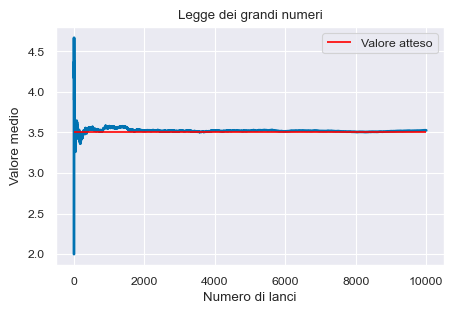

In [500]:
def simulate_dice_rolls(num_rolls):
    """Simulate dice rolls and return the average value for each roll."""
    total = 0
    averages = []
    for i in range(1, num_rolls + 1):
        roll = roll_die()
        total += roll
        averages.append(total / i)
    return averages


def plot_dice_rolls(averages, num_rolls):
    """Plot the average value after each dice roll."""
    x = range(1, num_rolls + 1)
    plt.plot(x, averages, linewidth=2)
    plt.hlines(y=3.5, xmin=0, xmax=num_rolls, color="red", label="Valore atteso")
    plt.xlabel("Numero di lanci")
    plt.ylabel("Valore medio")
    plt.title("Legge dei grandi numeri")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    num_rolls = 10000
    averages = simulate_dice_rolls(num_rolls)
    plot_dice_rolls(averages, num_rolls)


## Commenti e considerazioni finali

In questo capitolo abbiamo imparato come costruire lo spazio campione per un esperimento casuale e le proprietà di base della probabilità. Abbiamo anche visto come assegnare probabilità agli eventi definiti su uno spazio campione discreto e introdotto il concetto di variabile casuale, ovvero una variabile che assume valori in modo casuale. Abbiamo discusso le funzioni di ripartizione e di massa di probabilità per specificare le probabilità con cui una variabile casuale assume i suoi valori. Inoltre, abbiamo visto alcuni esempi sull'uso di strumenti del linguaggio Python per calcolare le probabilità, come liste, cicli, *list comprehension* e funzioni del modulo `itertools`. Abbiamo anche introdotto il concetto di simulazione, che può aiutare a comprendere il comportamento di un sistema modellato. Tuttavia, è importante ricordare che i modelli, compresi quelli derivati dalle simulazioni, sono sempre solo un'approssimazione della realtà e possono essere influenzati da assunzioni semplificative e limitazioni dei dati a disposizione. Pertanto, è necessario esercitare cautela nell'interpretazione dei risultati dei modelli. In questo contesto, si può ricordare la celebre frase di George Box, "Tutti i modelli sono sbagliati, ma alcuni sono utili".

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w